In [1]:
import pandas as pd
import numpy as np
from  sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport

In [2]:
df=pd.read_csv(r"C:\Users\lenov\Downloads\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
ProfileReport(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [5]:
x=df.drop(columns='quality')
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [6]:
y=df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)

In [8]:
dt_model=DecisionTreeClassifier()

In [9]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
dt_model.score(x_test,y_test)

0.653125

In [11]:
dt_model.score(x_train,y_train)

1.0

In [15]:
y_pred=dt_model.predict(x_test)

In [17]:
dt_model.score(x_test,y_pred)

1.0

In [18]:
model=DecisionTreeClassifier(criterion='entropy')

In [19]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
model.score(x_test,y_test)

0.6125

In [18]:
outfile=open('model.meta.dot','w')
tree.export_graphviz(model,out_file=outfile,feature_names=x.columns)

In [19]:
dir()

['DecisionTreeClassifier',
 'GridSearchCV',
 'In',
 'Out',
 'ProfileReport',
 '_',
 '_12',
 '_13',
 '_14',
 '_16',
 '_17',
 '_4',
 '_5',
 '_7',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'accuracy_score',
 'confusion_matrix',
 'df',
 'dt_model',
 'exit',
 'get_ipython',
 'model',
 'np',
 'outfile',
 'pd',
 'quit',
 'roc_auc_score',
 'roc_curve',
 'train_test_split',
 'tree',
 'x',
 'x_test',
 'x_train',
 'y',
 'y_test',
 'y_train']

In [20]:
#### Decision trees 2

In [1]:
import sklearn
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
sklearn.__version__

'1.1.2'

[Text(0.5291700092376507, 0.9722222222222222, 'X[10] <= 10.15\ngini = 0.641\nsamples = 1279\nvalue = [8, 39, 547, 510, 160, 15]'),
 Text(0.30851322442629325, 0.9166666666666666, 'X[6] <= 95.5\ngini = 0.51\nsamples = 640\nvalue = [5, 21, 405, 189, 18, 2]'),
 Text(0.20045702061454687, 0.8611111111111112, 'X[9] <= 0.585\ngini = 0.543\nsamples = 553\nvalue = [5, 20, 325, 183, 18, 2]'),
 Text(0.08262835472578763, 0.8055555555555556, 'X[10] <= 9.75\ngini = 0.453\nsamples = 264\nvalue = [2, 14, 185, 61, 2, 0]'),
 Text(0.04001361338000778, 0.75, 'X[8] <= 3.545\ngini = 0.409\nsamples = 188\nvalue = [1, 12, 140, 34, 1, 0]'),
 Text(0.03690198366394399, 0.6944444444444444, 'X[10] <= 9.075\ngini = 0.395\nsamples = 185\nvalue = [1, 12, 140, 31, 1, 0]'),
 Text(0.015558148580318941, 0.6388888888888888, 'X[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(0.006223259432127577, 0.5833333333333334, 'X[8] <= 3.38\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.0

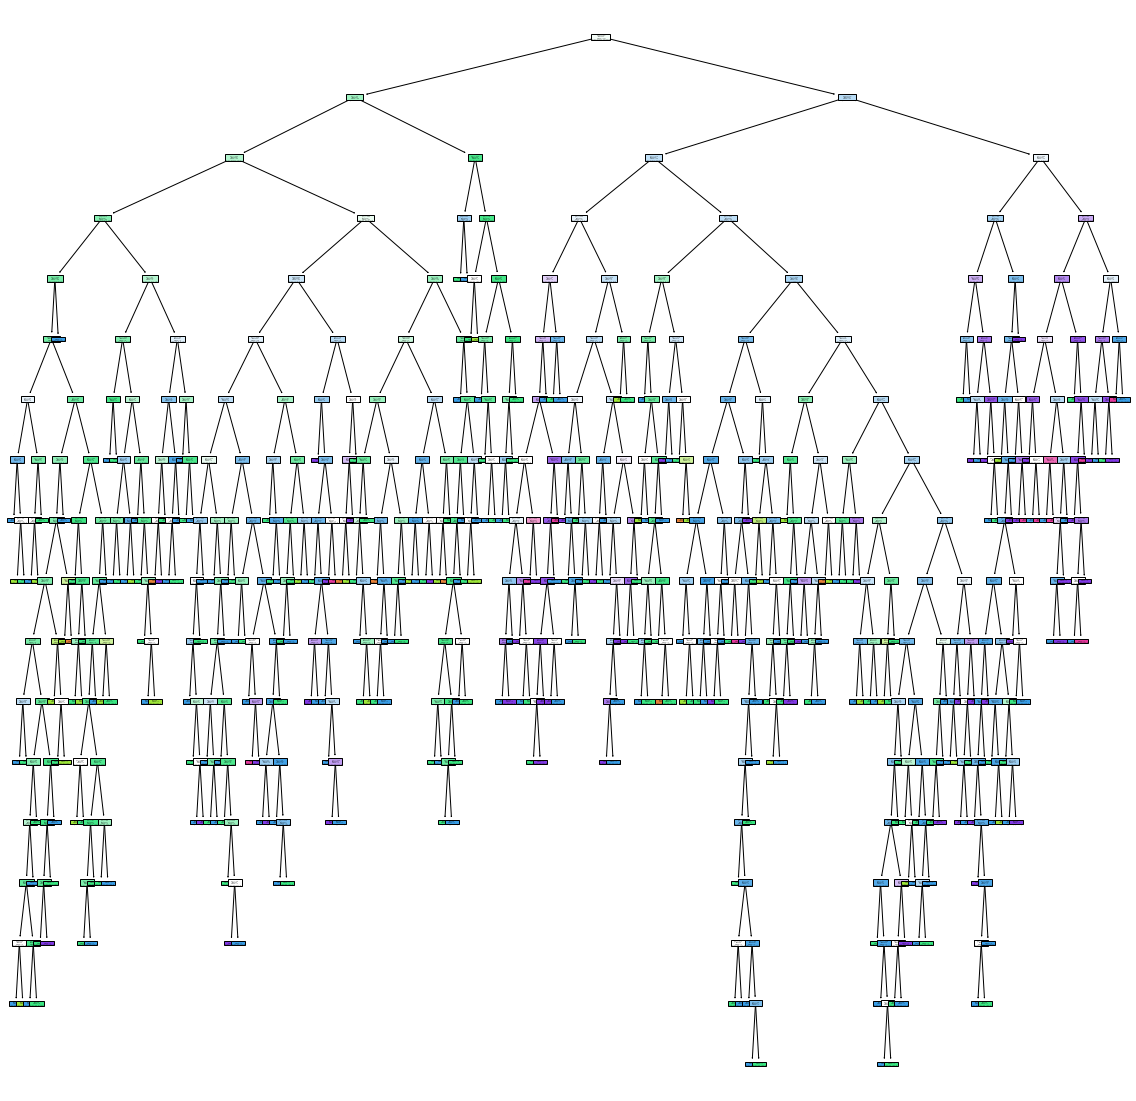

In [20]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

In [23]:
df1=df.head(500)

In [24]:
x1=df1.drop(columns='quality')

In [25]:
y1=df1.quality

In [26]:
dt_model1=DecisionTreeClassifier()


In [27]:
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

In [28]:
class_names=[str(i) for i in set(y1)]
class_names

['3', '4', '5', '6', '7', '8']

[Text(0.4547975142721218, 0.9705882352941176, 'alcohol <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]\nclass = 5'),
 Text(0.2848477640342531, 0.9117647058823529, 'total sulfur dioxide <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]\nclass = 5'),
 Text(0.1795908658420552, 0.8529411764705882, 'citric acid <= 0.415\ngini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]\nclass = 5'),
 Text(0.0851569933396765, 0.7941176470588235, 'alcohol <= 9.05\ngini = 0.525\nsamples = 131\nvalue = [0, 8, 81, 39, 3, 0]\nclass = 5'),
 Text(0.030447193149381543, 0.7352941176470589, 'sulphates <= 0.54\ngini = 0.403\nsamples = 12\nvalue = [0, 2, 1, 9, 0, 0]\nclass = 6'),
 Text(0.022835394862036156, 0.6764705882352942, 'volatile acidity <= 0.605\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]\nclass = 4'),
 Text(0.015223596574690771, 0.6176470588235294, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]\nclass = 4'),
 Text(0.030447193149381543, 0.617647

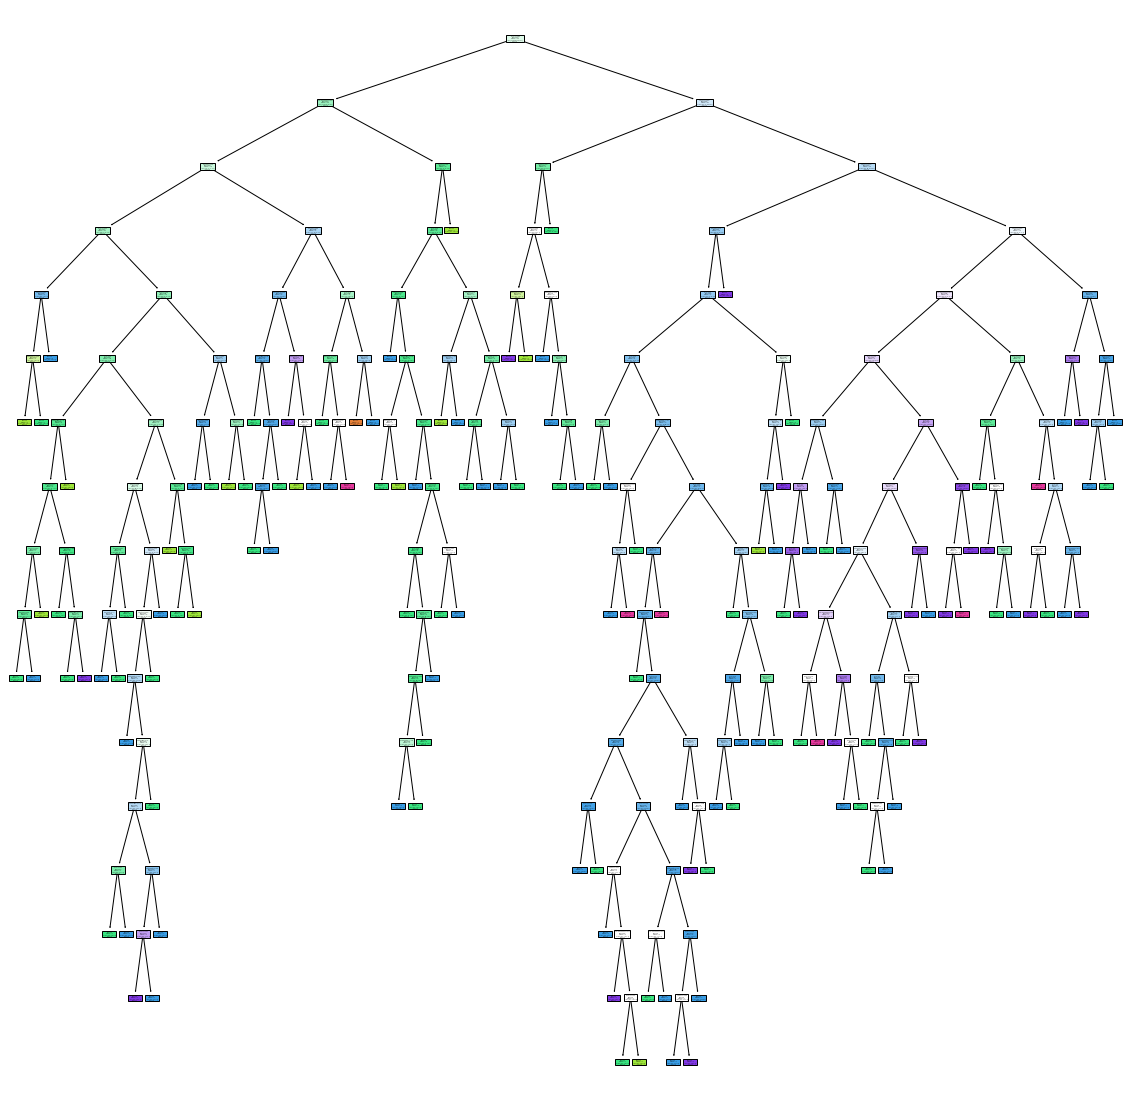

In [29]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1,filled=True, class_names=[str(i) for i in set(y1)],feature_names=x.columns)
## saving a decision tree picture
## plt.savefig('dt_model_1')

In [31]:
 dt_model1.predict(x1)

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 4, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 4, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 4, 6, 5, 4, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       7, 4, 7, 5, 5, 5, 6, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 4, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 4, 5, 5,
       5, 7, 4, 8, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 8, 7, 6, 7, 5, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6,

In [32]:
dt_model1.score(x1,y1)

1.0

In [33]:
dt_model1.score(x_test,y_test)

0.578125

In [34]:
## overrfitting a model by using a pruning operation 
#1. post pruning operation

In [35]:
path=dt_model1.cost_complexity_pruning_path(x1,y1)

In [36]:
path

{'ccp_alphas': array([0.        , 0.00175   , 0.00181818, 0.00184615, 0.00185   ,
        0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
        0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
        0.002     , 0.002     , 0.00247552, 0.00261111, 0.00262769,
        0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
        0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00272222,
        0.00283333, 0.003     , 0.003     , 0.003     , 0.003     ,
        0.00304762, 0.00304762, 0.00305051, 0.00308418, 0.00328205,
        0.00333333, 0.00333333, 0.00334032, 0.00336606, 0.00342857,
        0.00343316, 0.0035    , 0.0035    , 0.0036    , 0.00363636,
        0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
        0.00428571, 0.00428571, 0.00437662, 0.00462338, 0.00465709,
        0.00466667, 0.0048    , 0.00487179, 0.00504242, 0.00508235,
        0.00509091, 0.00510606, 0.00516667, 0.00568485, 0.00589394,
        0.00656364, 0.00671079, 0.

In [37]:
ccp_alpha=path.ccp_alphas

In [38]:
ccp_alpha

array([0.        , 0.00175   , 0.00181818, 0.00184615, 0.00185   ,
       0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.00247552, 0.00261111, 0.00262769,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00272222,
       0.00283333, 0.003     , 0.003     , 0.003     , 0.003     ,
       0.00304762, 0.00304762, 0.00305051, 0.00308418, 0.00328205,
       0.00333333, 0.00333333, 0.00334032, 0.00336606, 0.00342857,
       0.00343316, 0.0035    , 0.0035    , 0.0036    , 0.00363636,
       0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
       0.00428571, 0.00428571, 0.00437662, 0.00462338, 0.00465709,
       0.00466667, 0.0048    , 0.00487179, 0.00504242, 0.00508235,
       0.00509091, 0.00510606, 0.00516667, 0.00568485, 0.00589394,
       0.00656364, 0.00671079, 0.0067591 , 0.00688352, 0.00688

In [39]:
dt_model2=[]
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)

In [40]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00175),
 DecisionTreeClassifier(ccp_alpha=0.0018181818181818184),
 DecisionTreeClassifier(ccp_alpha=0.0018461538461538455),
 DecisionTreeClassifier(ccp_alpha=0.0018500000000000005),
 DecisionTreeClassifier(ccp_alpha=0.001866666666666667),
 DecisionTreeClassifier(ccp_alpha=0.001882352941176471),
 DecisionTreeClassifier(ccp_alpha=0.0019230769230769243),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.0024755244755244737),
 DecisionTreeClassifier(ccp_alpha=0.0026111111111111114),
 DecisionTreeClassifier(ccp_alpha=0.0026276923076923083),
 DecisionTreeClassifier(ccp_alp

In [41]:
# we are selected the model  is  a lowest  overfited result

In [42]:
train_score=[]
for i in dt_model2:
    train_score.append(i.score(x1,y1))

In [43]:
train_score



[1.0,
 0.998,
 0.996,
 0.994,
 0.992,
 0.988,
 0.988,
 0.984,
 0.962,
 0.96,
 0.962,
 0.962,
 0.964,
 0.958,
 0.962,
 0.962,
 0.962,
 0.958,
 0.95,
 0.944,
 0.93,
 0.93,
 0.926,
 0.93,
 0.93,
 0.93,
 0.93,
 0.928,
 0.928,
 0.926,
 0.924,
 0.92,
 0.912,
 0.914,
 0.918,
 0.916,
 0.91,
 0.906,
 0.904,
 0.902,
 0.898,
 0.9,
 0.894,
 0.896,
 0.892,
 0.886,
 0.886,
 0.884,
 0.878,
 0.88,
 0.874,
 0.87,
 0.86,
 0.86,
 0.858,
 0.858,
 0.856,
 0.852,
 0.848,
 0.824,
 0.818,
 0.814,
 0.81,
 0.804,
 0.802,
 0.794,
 0.79,
 0.786,
 0.784,
 0.78,
 0.776,
 0.776,
 0.772,
 0.768,
 0.762,
 0.758,
 0.742,
 0.728,
 0.718,
 0.698,
 0.69,
 0.682,
 0.676,
 0.676,
 0.636,
 0.596,
 0.596,
 0.596,
 0.558,
 0.478]

In [44]:
test_score=[i.score (x_test,y_test) for i in dt_model2]

In [45]:
test_score

[0.575,
 0.578125,
 0.56875,
 0.590625,
 0.5875,
 0.609375,
 0.578125,
 0.55625,
 0.59375,
 0.5625,
 0.571875,
 0.59375,
 0.590625,
 0.56875,
 0.575,
 0.55625,
 0.5875,
 0.59375,
 0.5875,
 0.584375,
 0.575,
 0.59375,
 0.590625,
 0.625,
 0.590625,
 0.578125,
 0.590625,
 0.603125,
 0.5875,
 0.5875,
 0.590625,
 0.584375,
 0.5875,
 0.596875,
 0.59375,
 0.575,
 0.565625,
 0.578125,
 0.5875,
 0.59375,
 0.6,
 0.6125,
 0.60625,
 0.584375,
 0.590625,
 0.6125,
 0.603125,
 0.59375,
 0.596875,
 0.584375,
 0.603125,
 0.590625,
 0.5875,
 0.590625,
 0.6,
 0.603125,
 0.584375,
 0.590625,
 0.6,
 0.5875,
 0.584375,
 0.590625,
 0.590625,
 0.6,
 0.59375,
 0.584375,
 0.58125,
 0.58125,
 0.571875,
 0.571875,
 0.575,
 0.56875,
 0.5625,
 0.56875,
 0.56875,
 0.571875,
 0.565625,
 0.5625,
 0.56875,
 0.55,
 0.5625,
 0.5625,
 0.553125,
 0.553125,
 0.528125,
 0.553125,
 0.553125,
 0.553125,
 0.528125,
 0.41875]

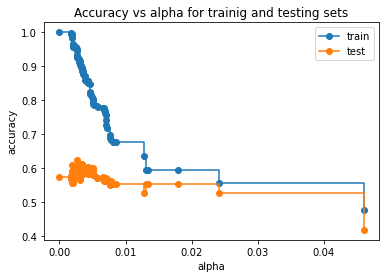

In [46]:
fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for trainig and testing sets")
ax.plot(ccp_alpha,train_score,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alpha,test_score,marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

In [47]:
dt_model_ccp=DecisionTreeClassifier(random_state=0,ccp_alpha=0.14)
dt_model_ccp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.14, random_state=0)

[Text(0.5, 0.5, 'gini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]')]

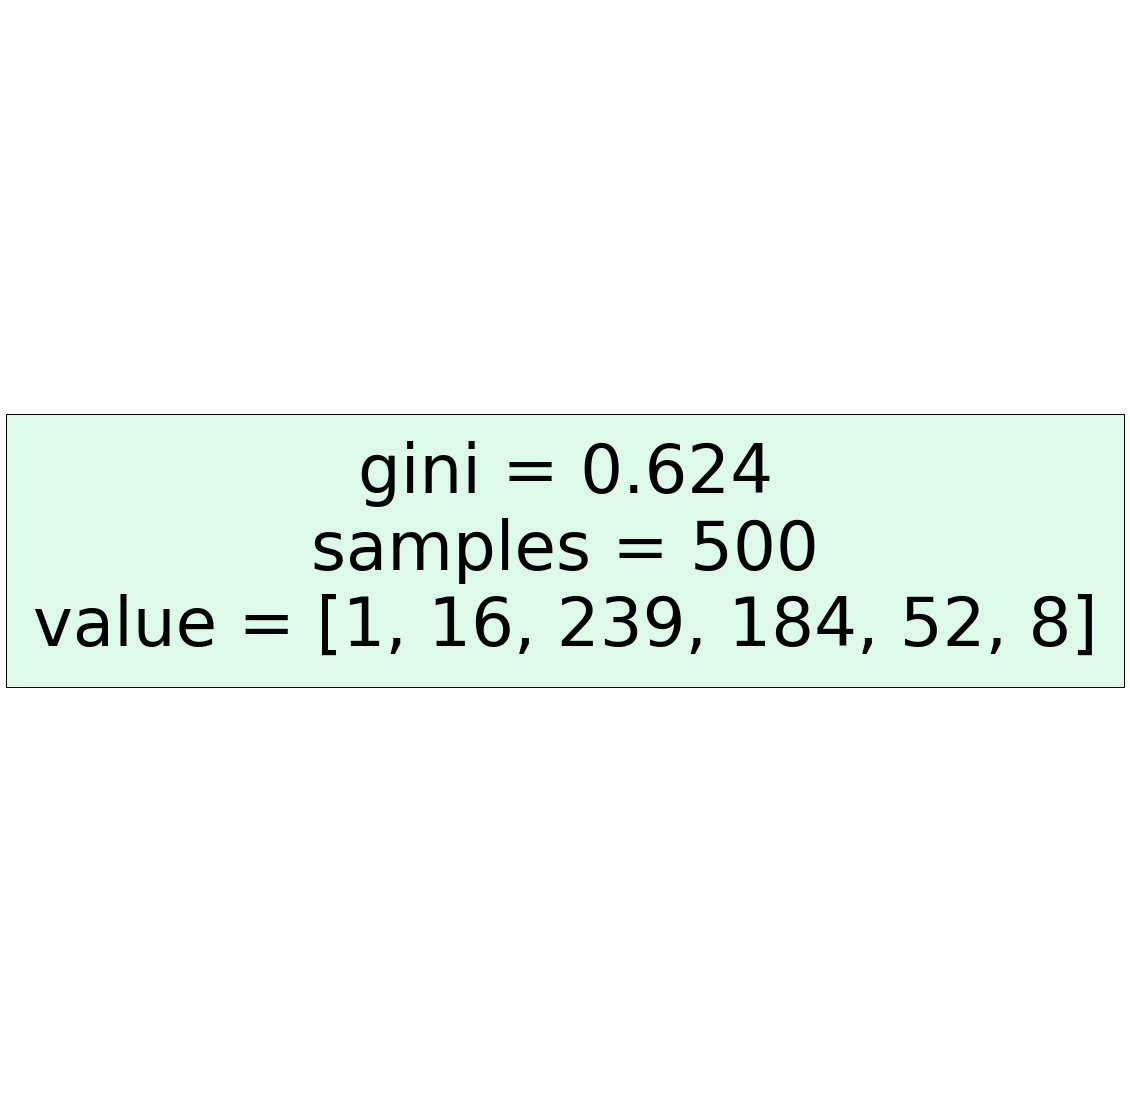

In [46]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [48]:
dt_model_ccp.score(x1,y1)

0.478

In [49]:
dt_model_ccp.score(x_test,y_test)

0.41875

In [50]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [51]:
grid_pram= {'criterion':['gini','entropy'],
           'splitter':['best','random'],
           'max_depth':range(2,40,1,),
            'min_samples_split':range(2,10,1),
            'min_samples_leaf':range(1,10,1)
            }

In [52]:
grid_ccp=GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram, cv=5, n_jobs=-1)

In [54]:
grid_ccp.fit(x1,y1)

C:\Users\lenov\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.14, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [56]:
grid_ccp.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [57]:
dt_ccp_new=DecisionTreeClassifier(criterion='entropy',max_depth=15, min_samples_leaf=15,min_samples_split=2,splitter='random',ccp_alpha=0.014)

In [58]:
dt_ccp_new.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, criterion='entropy', max_depth=15,
                       min_samples_leaf=15, splitter='random')

In [59]:
dt_ccp_new.score(x1,y1)

0.6

In [60]:
dt_ccp_new.score(x_test,y_test)

0.525

In [61]:
pred=dt_ccp_new.predict(x_train)

In [62]:
pred

array([7, 5, 5, ..., 5, 6, 7], dtype=int64)

In [63]:
confusion_matrix(y_train,pred)

array([[  0,   0,   5,   3,   0,   0],
       [  0,   0,  28,   6,   5,   0],
       [  0,   0, 429,  98,  20,   0],
       [  0,   0, 248, 189,  73,   0],
       [  0,   0,  28,  90,  42,   0],
       [  0,   0,   2,   7,   6,   0]], dtype=int64)

### Bagging classifier 

In [64]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [65]:
x=df.drop(columns='quality')

In [66]:
y=df.quality

In [67]:
from sklearn.ensemble import BaggingClassifier

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [86]:
bag_dt=BaggingClassifier(DecisionTreeClassifier(),n_estimators=100)

In [87]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [88]:
bag_dt.predict(x_test)

array([5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 4, 5, 7, 7, 5, 5, 6, 6, 5,
       6, 7, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5, 7, 7, 5, 6, 6, 6, 5, 7, 6, 6,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 6, 5, 7, 6, 7, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 7, 6, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 8, 6, 5, 5, 6, 7, 5, 6,
       6, 6, 6, 6, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5, 6,
       7, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 7, 6, 6, 6, 5, 7, 5, 6, 5, 7, 6, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 7, 6, 6, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6,

In [72]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [73]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [74]:
bag_dt.estimator_params

()

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
bag_knn=BaggingClassifier(KNeighborsClassifier(6),n_estimators=100)

In [92]:
bag_knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6),
                  n_estimators=100)

In [93]:
bag_knn.predict(x_test)

array([5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 7, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 5,
       5, 7, 7, 7, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 7, 5, 7, 7, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 7, 6, 6, 5, 5, 6, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 7, 7, 6,
       7, 7, 7, 5, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 7, 6, 6, 6, 7, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 7, 5, 6, 7, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6,

In [80]:
### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf=RandomForestClassifier(n_estimators=5)

In [114]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [115]:
rf.score(x_test,y_test)

0.6475

In [105]:
bag_dt.score(x_test,y_test)

0.6925

In [94]:
bag_knn.score(x_test,y_test)

0.505

In [116]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=609437970),
 DecisionTreeClassifier(max_features='sqrt', random_state=621268240),
 DecisionTreeClassifier(max_features='sqrt', random_state=1803173643),
 DecisionTreeClassifier(max_features='sqrt', random_state=645386184),
 DecisionTreeClassifier(max_features='sqrt', random_state=2047587257)]

In [117]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=609437970)

[Text(0.6788366336633663, 0.9736842105263158, 'X[6] <= 83.5\ngini = 0.649\nsamples = 750\nvalue = [4, 50, 505, 471, 158, 11]'),
 Text(0.42942450495049506, 0.9210526315789473, 'X[9] <= 0.645\ngini = 0.656\nsamples = 631\nvalue = [4, 45, 370, 438, 144, 10]'),
 Text(0.18217821782178217, 0.868421052631579, 'X[7] <= 0.995\ngini = 0.599\nsamples = 350\nvalue = [4, 38, 278, 193, 25, 1]'),
 Text(0.054455445544554455, 0.8157894736842105, 'X[10] <= 10.05\ngini = 0.625\nsamples = 84\nvalue = [0, 6, 41, 68, 17, 1]'),
 Text(0.0504950495049505, 0.7631578947368421, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 18, 0, 0, 0]'),
 Text(0.05841584158415842, 0.7631578947368421, 'X[6] <= 23.0\ngini = 0.586\nsamples = 73\nvalue = [0, 6, 23, 68, 17, 1]'),
 Text(0.02574257425742574, 0.7105263157894737, 'X[1] <= 0.375\ngini = 0.721\nsamples = 26\nvalue = [0, 4, 12, 9, 11, 0]'),
 Text(0.015841584158415842, 0.6578947368421053, 'X[7] <= 0.994\ngini = 0.426\nsamples = 10\nvalue = [0, 0, 0, 4, 9, 0]'),
 Text(0.007920792

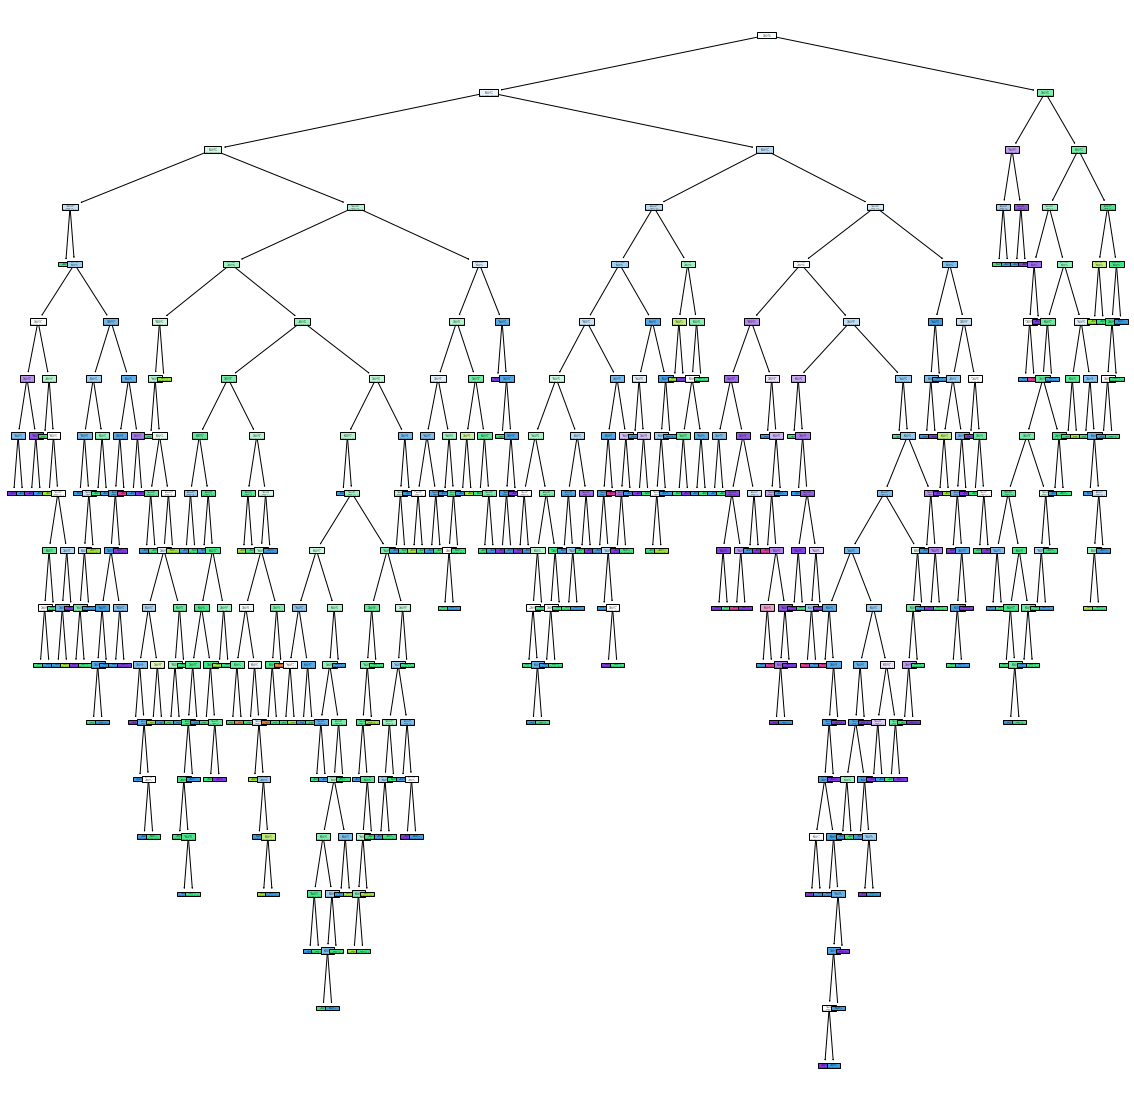

In [118]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0],filled=True)

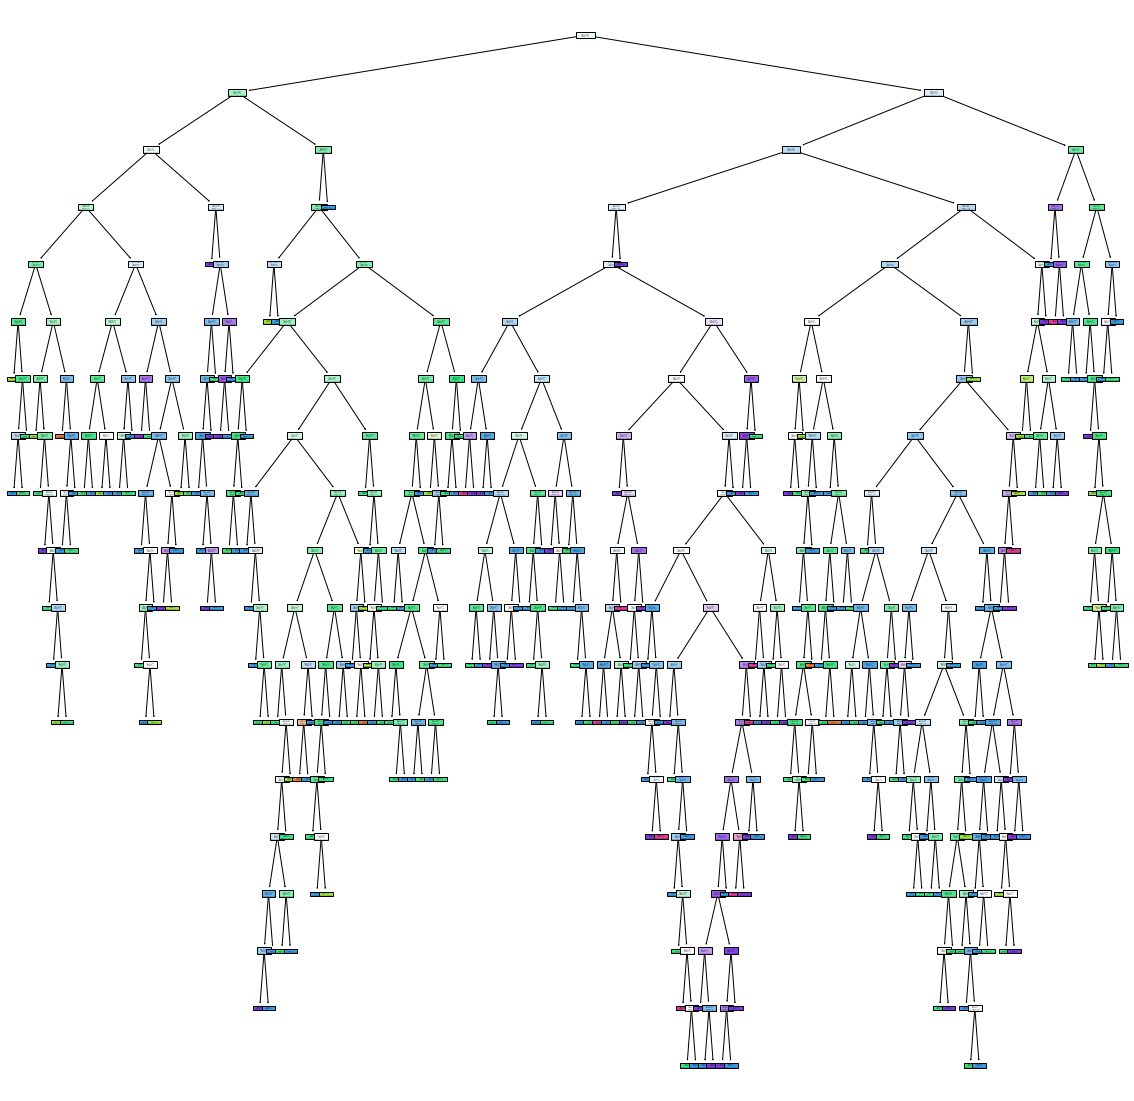

In [119]:
plt.figure(figsize=(20,20))
for i in range(len(rf.estimators_)):
    tree.plot_tree(rf.estimators_[i] ,  filled=True)

In [127]:
grid_pram={
    "n_estimators":[5,10,50,100,120,150],
    "criterion":['gini','entropy'],
    "max_depth":range(10),
    "min_samples_leaf":range(10)
    
}

In [128]:
rf1=RandomForestClassifier(n_estimators=5)

In [129]:
grid_search_rf=GridSearchCV(param_grid=grid_pram, cv=10, n_jobs=6,verbose=1,estimator=rf1)

In [130]:
grid_search_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\lenov\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2280 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenov\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenov\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees 

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [131]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 120}

In [132]:
rf_new=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_leaf=1,n_estimators=120)

In [133]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=120)

In [134]:
rf_new.score(x_train,y_train)

0.9591326105087573

In [135]:
rf_new.score(x_test,y_test)

0.6775

[Text(0.5346910112359551, 0.95, 'X[10] <= 10.525\nentropy = 1.721\nsamples = 758\nvalue = [6, 40, 525, 457, 154, 17]'),
 Text(0.22893258426966293, 0.85, 'X[10] <= 9.65\nentropy = 1.336\nsamples = 467\nvalue = [5, 19, 448, 249, 24, 2]'),
 Text(0.1550561797752809, 0.75, 'X[6] <= 105.5\nentropy = 1.044\nsamples = 245\nvalue = [0, 8, 267, 112, 2, 0]'),
 Text(0.1146067415730337, 0.65, 'X[9] <= 0.585\nentropy = 1.088\nsamples = 210\nvalue = [0, 5, 203, 112, 2, 0]'),
 Text(0.056179775280898875, 0.55, 'X[4] <= 0.08\nentropy = 0.965\nsamples = 105\nvalue = [0, 5, 117, 36, 0, 0]'),
 Text(0.020224719101123594, 0.45, 'X[6] <= 33.5\nentropy = 1.164\nsamples = 49\nvalue = [0, 3, 44, 27, 0, 0]'),
 Text(0.008988764044943821, 0.35, 'X[5] <= 8.5\nentropy = 0.485\nsamples = 13\nvalue = [0, 0, 17, 2, 0, 0]'),
 Text(0.0044943820224719105, 0.25, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 11, 0, 0, 0]'),
 Text(0.01348314606741573, 0.25, 'X[4] <= 0.073\nentropy = 0.811\nsamples = 4\nvalue = [0, 0, 6, 2, 0, 0

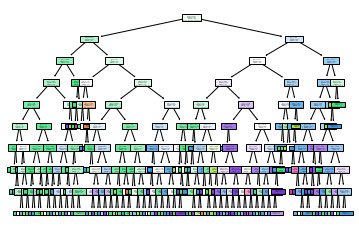

In [136]:
plt.firgure=(20,20)
tree.plot_tree(rf_new.estimators_[0],filled=True)